In [1]:

import sqlite3 as sl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Inflation_Rate_df=pd.read_csv("C:/Users/nahla/OneDrive/Desktop/Data_Analysis/DataSets/Historical U.S. Inflation Rate by Year_ 1929 to 2024 - Sheet1 (1).csv" )


In [3]:
Inflation_Rate_df['Year'] = Inflation_Rate_df['Year'].astype(int)

# Filter the data from 2018 onwards
Inflation_Rate_df = Inflation_Rate_df[Inflation_Rate_df['Year'] >= 2018]

Inflation_Rate_df

,Year,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle*,Events Affecting Inflation
89,2018,1.90%,2.50%,Expansion (3.0%),NaN
90,2019,2.30%,1.75%,Expansion (2.5%),NaN
91,2020,1.40%,0.25%,Contraction (-2.2%),COVID-19 pandemic
92,2021,7.00%,0.25%,Expansion (5.8%),COVID-19 pandemic
93,2022,6.50%,4.50%,Expansion (1.9%),Russia invades Ukraine
94,2023,3.40%,5.50%,Expansion (2.5%),Fed raised rates


In [4]:
years_inf = Inflation_Rate_df['Year'].values 
print(years_inf)

[2018 2019 2020 2021 2022 2023]


In [5]:
Inflation_Rate_df.isnull().sum()

Year                                      0
Inflation Rate YOY, From Previous Dec.    0
Federal Funds Rate                        0
Business Cycle*                           0
Events Affecting Inflation                2
dtype: int64

In [6]:
Inflation_Rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 89 to 94
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Year                                    6 non-null      int32 
 1   Inflation Rate YOY, From Previous Dec.  6 non-null      object
 2   Federal Funds Rate                      6 non-null      object
 3   Business Cycle*                         6 non-null      object
 4   Events Affecting Inflation              4 non-null      object
dtypes: int32(1), object(4)
memory usage: 264.0+ bytes


In [7]:
retail_sales_df = pd.read_csv("C:/Users/nahla/OneDrive/Desktop/Data_Analysis/DataSets/StateAndCategory (1).csv", encoding="latin1")


In [8]:
Groceries_sales_df = pd.read_csv("C:/Users/nahla/OneDrive/Desktop/Data_Analysis/DataSets/Food_price.csv")

In [9]:
sales_df = pd.merge(Groceries_sales_df, Inflation_Rate_df, 
                              left_on='Year', right_on='Year', how='left')

In [10]:
retail_sales_df

,Date,State,Category,Variable,Value
0,2019-10-06,Alabama,Alcohol,Dollars,23611285.0
1,2019-10-13,Alabama,Alcohol,Dollars,23220758.0
2,2019-10-20,Alabama,Alcohol,Dollars,21770283.0
3,2019-10-27,Alabama,Alcohol,Dollars,21956558.0
4,2019-11-03,Alabama,Alcohol,Dollars,23183482.0
...,...,...,...,...,...
889235,2023-04-09,Wyoming,Vegetables,Percent change units 3 years,-10.0
889236,2023-04-16,Wyoming,Vegetables,Percent change units 3 years,-22.2
889237,2023-04-23,Wyoming,Vegetables,Percent change units 3 years,-18.6
889238,2023-04-30,Wyoming,Vegetables,Percent change units 3 years,-17.9


In [11]:
Groceries_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Consumer Price Index item  1100 non-null   object 
 1   Year                       1100 non-null   int64  
 2   Percent change             1075 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.9+ KB


In [12]:
print(Groceries_sales_df['Year'].dtype)

int64


In [13]:
Groceries_sales_df['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1100 entries, 0 to 1099
Series name: Year
Non-Null Count  Dtype
--------------  -----
1100 non-null   int64
dtypes: int64(1)
memory usage: 8.7 KB


In [14]:
print(Inflation_Rate_df['Year'].dtype)

int32


In [21]:
print(Groceries_sales_df.dtypes)

Consumer Price Index item     object
Year                           int64
Percent change               float64
dtype: object


In [22]:

Groceries_sales_df = Groceries_sales_df[~Groceries_sales_df['Consumer Price Index item'].isin(['All food', 'Food away from home','Food at home'	, 'Other foods'])]
Groceries_sales_df = Groceries_sales_df[Groceries_sales_df['Year'] >= 2018]

Groceries_sales_df.head()


,Consumer Price Index item,Year,Percent change
194,"Meats, poultry, and fish",2018,0.7
195,"Meats, poultry, and fish",2019,1.0
196,"Meats, poultry, and fish",2020,6.3
197,"Meats, poultry, and fish",2021,6.8
198,"Meats, poultry, and fish",2022,9.6


In [31]:
sales_df = pd.merge(Groceries_sales_df, Inflation_Rate_df, 
                              left_on='Year', right_on='Year', how='left')


In [35]:
sales_df

,Consumer Price Index item,Year,Percent change,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle*,Events Affecting Inflation
0,"Meats, poultry, and fish",2018,0.7,1.90%,2.50%,Expansion (3.0%),NaN
1,"Meats, poultry, and fish",2019,1.0,2.30%,1.75%,Expansion (2.5%),NaN
2,"Meats, poultry, and fish",2020,6.3,1.40%,0.25%,Contraction (-2.2%),COVID-19 pandemic
3,"Meats, poultry, and fish",2021,6.8,7.00%,0.25%,Expansion (5.8%),COVID-19 pandemic
4,"Meats, poultry, and fish",2022,9.6,6.50%,4.50%,Expansion (1.9%),Russia invades Ukraine
...,...,...,...,...,...,...,...
103,Nonalcoholic beverages,2019,1.9,2.30%,1.75%,Expansion (2.5%),NaN
104,Nonalcoholic beverages,2020,3.6,1.40%,0.25%,Contraction (-2.2%),COVID-19 pandemic
105,Nonalcoholic beverages,2021,2.8,7.00%,0.25%,Expansion (5.8%),COVID-19 pandemic
106,Nonalcoholic beverages,2022,11.0,6.50%,4.50%,Expansion (1.9%),Russia invades Ukraine


In [37]:
Groceries_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 194 to 1049
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Consumer Price Index item  108 non-null    object 
 1   Year                       108 non-null    int64  
 2   Percent change             108 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


In [39]:
sales_df.isnull().sum()

Consumer Price Index item                  0
Year                                       0
Percent change                             0
Inflation Rate YOY, From Previous Dec.     0
Federal Funds Rate                         0
Business Cycle*                            0
Events Affecting Inflation                36
dtype: int64

In [41]:
sales_df.dropna(inplace=True)

In [43]:
sales_df.isnull().sum()

Consumer Price Index item                 0
Year                                      0
Percent change                            0
Inflation Rate YOY, From Previous Dec.    0
Federal Funds Rate                        0
Business Cycle*                           0
Events Affecting Inflation                0
dtype: int64

In [45]:
sales_df

,Consumer Price Index item,Year,Percent change,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle*,Events Affecting Inflation
2,"Meats, poultry, and fish",2020,6.3,1.40%,0.25%,Contraction (-2.2%),COVID-19 pandemic
3,"Meats, poultry, and fish",2021,6.8,7.00%,0.25%,Expansion (5.8%),COVID-19 pandemic
4,"Meats, poultry, and fish",2022,9.6,6.50%,4.50%,Expansion (1.9%),Russia invades Ukraine
5,"Meats, poultry, and fish",2023,2.0,3.40%,5.50%,Expansion (2.5%),Fed raised rates
8,Meats,2020,7.4,1.40%,0.25%,Contraction (-2.2%),COVID-19 pandemic
...,...,...,...,...,...,...,...
101,Cereals and bakery products,2023,8.4,3.40%,5.50%,Expansion (2.5%),Fed raised rates
104,Nonalcoholic beverages,2020,3.6,1.40%,0.25%,Contraction (-2.2%),COVID-19 pandemic
105,Nonalcoholic beverages,2021,2.8,7.00%,0.25%,Expansion (5.8%),COVID-19 pandemic
106,Nonalcoholic beverages,2022,11.0,6.50%,4.50%,Expansion (1.9%),Russia invades Ukraine


In [47]:
sales_df.columns

Index(['Consumer Price Index item', 'Year', 'Percent change',
       'Inflation Rate YOY, From Previous Dec.', 'Federal Funds Rate',
       'Business Cycle*', 'Events Affecting Inflation'],
      dtype='object')

In [49]:
sales_df.columns

Index(['Consumer Price Index item', 'Year', 'Percent change',
       'Inflation Rate YOY, From Previous Dec.', 'Federal Funds Rate',
       'Business Cycle*', 'Events Affecting Inflation'],
      dtype='object')

In [51]:
# Rename remaining columns for clarity
sales_df.rename(columns={
    'Inflation Rate YOY, From Previous Dec.': 'Inflation Rate YOY From Previous Dec', 
    'Federal Funds Rate_x': 'Federal Funds Rate', 
    'Business Cycle*_x': 'Business Cycle*', 
    'Events Affecting Inflation_x': 'Events Affecting Inflation'
    ,'Consumer Price Index item':'item'
}, inplace=True)



In [53]:
sales_df.columns

Index(['item', 'Year', 'Percent change',
       'Inflation Rate YOY From Previous Dec', 'Federal Funds Rate',
       'Business Cycle*', 'Events Affecting Inflation'],
      dtype='object')

In [55]:
sales_df.head()

,item,Year,Percent change,Inflation Rate YOY From Previous Dec,Federal Funds Rate,Business Cycle*,Events Affecting Inflation
2,"Meats, poultry, and fish",2020,6.3,1.40%,0.25%,Contraction (-2.2%),COVID-19 pandemic
3,"Meats, poultry, and fish",2021,6.8,7.00%,0.25%,Expansion (5.8%),COVID-19 pandemic
4,"Meats, poultry, and fish",2022,9.6,6.50%,4.50%,Expansion (1.9%),Russia invades Ukraine
5,"Meats, poultry, and fish",2023,2.0,3.40%,5.50%,Expansion (2.5%),Fed raised rates
8,Meats,2020,7.4,1.40%,0.25%,Contraction (-2.2%),COVID-19 pandemic


In [57]:

retail_sales_df.head()

,Date,State,Category,Variable,Value
0,2019-10-06,Alabama,Alcohol,Dollars,23611285.0
1,2019-10-13,Alabama,Alcohol,Dollars,23220758.0
2,2019-10-20,Alabama,Alcohol,Dollars,21770283.0
3,2019-10-27,Alabama,Alcohol,Dollars,21956558.0
4,2019-11-03,Alabama,Alcohol,Dollars,23183482.0


In [59]:
# Rename the 'Value' column to 'Price'
retail_sales_df.rename(columns={"Value": "Price"}, inplace=True)

# Display the updated DataFrame
retail_sales_df.head()


,Date,State,Category,Variable,Price
0,2019-10-06,Alabama,Alcohol,Dollars,23611285.0
1,2019-10-13,Alabama,Alcohol,Dollars,23220758.0
2,2019-10-20,Alabama,Alcohol,Dollars,21770283.0
3,2019-10-27,Alabama,Alcohol,Dollars,21956558.0
4,2019-11-03,Alabama,Alcohol,Dollars,23183482.0


In [61]:
retail_sales_df.isnull().sum()

Date             0
State            0
Category         0
Variable         0
Price       199066
dtype: int64

In [63]:

print(retail_sales_df.columns)

Index(['Date', 'State', 'Category', 'Variable', 'Price'], dtype='object')


In [65]:
retail_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889240 entries, 0 to 889239
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      889240 non-null  object 
 1   State     889240 non-null  object 
 2   Category  889240 non-null  object 
 3   Variable  889240 non-null  object 
 4   Price     690174 non-null  float64
dtypes: float64(1), object(4)
memory usage: 33.9+ MB


In [67]:
retail_sales_df.loc[:, 'Date'] = pd.to_datetime(retail_sales_df['Date'])


In [68]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2 to 107
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   item                                  72 non-null     object 
 1   Year                                  72 non-null     int64  
 2   Percent change                        72 non-null     float64
 3   Inflation Rate YOY From Previous Dec  72 non-null     object 
 4   Federal Funds Rate                    72 non-null     object 
 5   Business Cycle*                       72 non-null     object 
 6   Events Affecting Inflation            72 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.5+ KB


In [69]:

retail_sales_df['Date'] = pd.to_datetime(retail_sales_df['Date'], errors='coerce')

In [70]:
print(retail_sales_df.dtypes)

Date        datetime64[ns]
State               object
Category            object
Variable            object
Price              float64
dtype: object


In [71]:
retail_sales_df['Year'] = retail_sales_df['Date'].dt.year

In [72]:
retail_sales_df['Category'].unique()


array(['Alcohol', 'Beverages', 'Commercially prepared items', 'Dairy',
       'Fats and oils', 'Fruits', 'Grains', 'Meats, eggs, and nuts',
       'Other', 'Sugar and sweeteners', 'Vegetables'], dtype=object)

In [73]:
retail_sales_df = retail_sales_df[retail_sales_df['Category'] != 'Other']


In [74]:
retail_sales_df['Category'].unique()

array(['Alcohol', 'Beverages', 'Commercially prepared items', 'Dairy',
       'Fats and oils', 'Fruits', 'Grains', 'Meats, eggs, and nuts',
       'Sugar and sweeteners', 'Vegetables'], dtype=object)

In [75]:
sales_df.columns

Index(['item', 'Year', 'Percent change',
       'Inflation Rate YOY From Previous Dec', 'Federal Funds Rate',
       'Business Cycle*', 'Events Affecting Inflation'],
      dtype='object')

In [76]:
sales_df['item'].unique()

array(['Meats, poultry, and fish', 'Meats', 'Beef and veal', 'Pork',
       'Other meats', 'Poultry', 'Fish and seafood', 'Eggs',
       'Dairy products', 'Fats and oils', 'Fruits and vegetables',
       'Fresh fruits and vegetables', 'Fresh fruits', 'Fresh vegetables',
       'Processed fruits and vegetables', 'Sugar and sweets',
       'Cereals and bakery products', 'Nonalcoholic beverages'],
      dtype=object)

In [79]:
categories_to_drop = ['All food', 'Food away from home', 'Food at home',
                      'Meats, poultry, and fish', 'Beef and veal', 
                      'Other meats', 'Other foods']

# Ensure sales_df is a DataFrame before filtering
if isinstance(sales_df, pd.DataFrame):
    sales_df = sales_df[~sales_df['item'].isin(categories_to_drop)]
else:
    print("Error: sales_df is not a DataFrame.")


In [89]:
type(sales_df)


pandas.core.frame.DataFrame

In [91]:
sales_df['item'].unique()

array(['Meats', 'Pork', 'Poultry', 'Fish and seafood', 'Eggs',
       'Dairy products', 'Fats and oils', 'Fruits and vegetables',
       'Fresh fruits and vegetables', 'Fresh fruits', 'Fresh vegetables',
       'Processed fruits and vegetables', 'Sugar and sweets',
       'Cereals and bakery products', 'Nonalcoholic beverages'],
      dtype=object)

In [93]:

sales_inflation_data = pd.merge(sales_df, retail_sales_df, 
                                on='Year', 
                                how='left')

In [94]:
sales_inflation_data = sales_inflation_data.drop(columns=['Date'])

In [95]:
sales_inflation_data.columns

Index(['item', 'Year', 'Percent change',
       'Inflation Rate YOY From Previous Dec', 'Federal Funds Rate',
       'Business Cycle*', 'Events Affecting Inflation', 'State', 'Category',
       'Variable', 'Price'],
      dtype='object')

In [96]:
sales_inflation_data.tail()

,item,Year,Percent change,Inflation Rate YOY From Previous Dec,Federal Funds Rate,Business Cycle*,Events Affecting Inflation,State,Category,Variable,Price
11287495,Nonalcoholic beverages,2023,7.0,3.40%,5.50%,Expansion (2.5%),Fed raised rates,Wyoming,Vegetables,Percent change units 3 years,-10.0
11287496,Nonalcoholic beverages,2023,7.0,3.40%,5.50%,Expansion (2.5%),Fed raised rates,Wyoming,Vegetables,Percent change units 3 years,-22.2
11287497,Nonalcoholic beverages,2023,7.0,3.40%,5.50%,Expansion (2.5%),Fed raised rates,Wyoming,Vegetables,Percent change units 3 years,-18.6
11287498,Nonalcoholic beverages,2023,7.0,3.40%,5.50%,Expansion (2.5%),Fed raised rates,Wyoming,Vegetables,Percent change units 3 years,-17.9
11287499,Nonalcoholic beverages,2023,7.0,3.40%,5.50%,Expansion (2.5%),Fed raised rates,Wyoming,Vegetables,Percent change units 3 years,-13.3


In [97]:
sales_inflation_data = sales_inflation_data.rename(columns={'Inflation Rate YOY From Previous Dec ': 'Inflation Rate YOY From Previous Dec'})

In [98]:
print(sales_inflation_data[['Inflation Rate YOY From Previous Dec', 'Federal Funds Rate']].head(20))


   Inflation Rate YOY From Previous Dec Federal Funds Rate
0                                 1.40%              0.25%
1                                 1.40%              0.25%
2                                 1.40%              0.25%
3                                 1.40%              0.25%
4                                 1.40%              0.25%
5                                 1.40%              0.25%
6                                 1.40%              0.25%
7                                 1.40%              0.25%
8                                 1.40%              0.25%
9                                 1.40%              0.25%
10                                1.40%              0.25%
11                                1.40%              0.25%
12                                1.40%              0.25%
13                                1.40%              0.25%
14                                1.40%              0.25%
15                                1.40%              0.2

In [100]:
# Remove the '%' sign and convert to float
sales_inflation_data['Inflation Rate YOY From Previous Dec'] = sales_inflation_data['Inflation Rate YOY From Previous Dec'].replace('%', '', regex=True).astype(float)

# For the Federal Funds Rate, remove any '%' and convert to numeric
sales_inflation_data['Federal Funds Rate'] = sales_inflation_data['Federal Funds Rate'].replace('%', '', regex=True).astype(float)



In [101]:
print(sales_inflation_data[['Inflation Rate YOY From Previous Dec', 'Federal Funds Rate']].head())


   Inflation Rate YOY From Previous Dec  Federal Funds Rate
0                                   1.4                0.25
1                                   1.4                0.25
2                                   1.4                0.25
3                                   1.4                0.25
4                                   1.4                0.25


In [102]:
inflation_trends = sales_inflation_data.groupby("Year").agg({
    "Inflation Rate YOY From Previous Dec": "mean",
    "Federal Funds Rate": "mean"
}).reset_index()

In [103]:
inflation_trends

,Year,Inflation Rate YOY From Previous Dec,Federal Funds Rate
0,2020,1.4,0.25
1,2021,7.0,0.25
2,2022,6.5,4.50
3,2023,3.4,5.50


2020: Inflation was very low (1.4%) due to economic contraction from COVID-19, with ultra-low interest rates (0.25%) to stimulate the economy.
2021: Inflation jumped to 7.0% due to supply chain disruptions and high consumer demand, but interest rates were still 0.25%, fueling price increases.
2022: The Fed raised interest rates aggressively (4.5%) to control inflation, bringing it down slightly to 6.5%.
2023: The inflation rate dropped further to 3.4%, thanks to even higher interest rates (5.5%), slowing down spending and borrowing.


There was a noticeable increase in both inflation and Federal Funds Rate starting in 2021, marking a shift in monetary policy in response to rising inflation.
The most significant inflation spike occurred in 2021, with the Federal Funds Rate remaining low until the Fed's intervention in 2022.
By 2023, both inflation and interest rates showed signs of stabilization, though inflation was still elevated compared to historical averages.

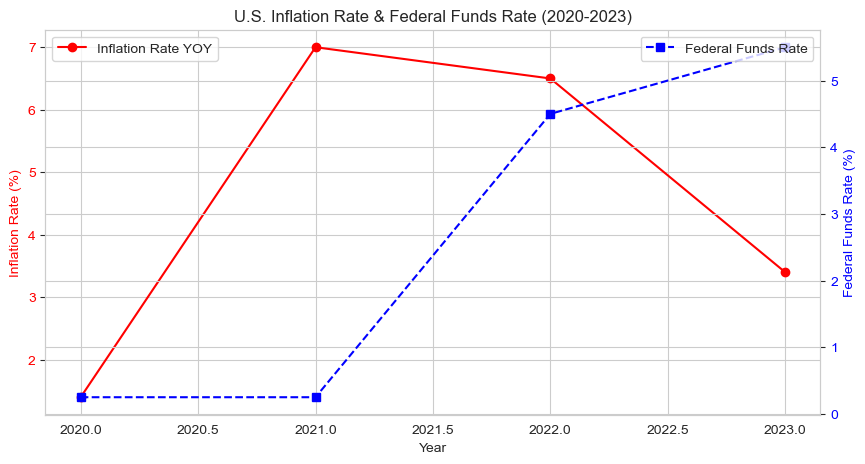

In [109]:

inflation_trends_df = pd.DataFrame(inflation_trends)
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(inflation_trends_df["Year"], inflation_trends_df["Inflation Rate YOY From Previous Dec"], marker="o", linestyle="-", color="red", label="Inflation Rate YOY")
ax1.set_xlabel("Year")
ax1.set_ylabel("Inflation Rate (%)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.plot(inflation_trends_df["Year"], inflation_trends_df["Federal Funds Rate"], marker="s", linestyle="--", color="blue", label="Federal Funds Rate")
ax2.set_ylabel("Federal Funds Rate (%)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("U.S. Inflation Rate & Federal Funds Rate (2020-2023)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


In [110]:

sales_inflation_data['Inflation Adjusted Price'] = sales_inflation_data['Price'] * (1 + sales_inflation_data['Inflation Rate YOY From Previous Dec'] / 100)


In [111]:

# Calculate mean, median, and standard deviation separately
percent_change_stats = sales_inflation_data['Percent change'].agg(['mean', 'median', 'std'])
value_stats = sales_inflation_data['Price'].agg(['mean', 'median', 'std'])
percent_change_stats
value_stats

mean      1.297659e+07
median    1.698650e+06
std       3.105920e+07
Name: Price, dtype: float64

In [112]:
sales_inflation_data.describe()


,Year,Percent change,Inflation Rate YOY From Previous Dec,Federal Funds Rate,Price,Inflation Adjusted Price
count,1.128750e+07,1.128750e+07,1.128750e+07,1.128750e+07,8.923350e+06,8.923350e+06
mean,2.021217e+03,6.171695e+00,4.796571e+00,2.082857e+00,1.297659e+07,1.363008e+07
std,9.906667e-01,5.456376e+00,2.438170e+00,2.236130e+00,3.105920e+07,3.264660e+07
min,2.020000e+03,-1.200000e+00,1.400000e+00,2.500000e-01,-6.930000e+01,-7.211800e+01
25%,2.020000e+03,2.800000e+00,1.400000e+00,2.500000e-01,1.010000e+01,1.054350e+01
50%,2.021000e+03,4.600000e+00,6.500000e+00,2.500000e-01,1.698650e+06,1.784406e+06
75%,2.022000e+03,8.500000e+00,7.000000e+00,4.500000e+00,1.229670e+07,1.290978e+07
max,2.023000e+03,3.220000e+01,7.000000e+00,5.500000e+00,6.452044e+08,6.902351e+08


In [114]:
# Grouping by Category and calculating average Inflation Rate
avg_inflation_by_category = sales_inflation_data.groupby('Category')['Inflation Adjusted Price'].mean().reset_index()

# Sorting by inflation rate
avg_inflation_by_category_sorted = avg_inflation_by_category.sort_values(by='Inflation Adjusted Price', ascending=False)
print(avg_inflation_by_category_sorted)


                      Category  Inflation Adjusted Price
2  Commercially prepared items              4.361225e+07
1                    Beverages              2.251556e+07
7        Meats, eggs, and nuts              2.005191e+07
3                        Dairy              1.101626e+07
9                   Vegetables              1.091406e+07
0                      Alcohol              1.073875e+07
5                       Fruits              8.527332e+06
6                       Grains              6.674551e+06
4                Fats and oils              1.643423e+06
8         Sugar and sweeteners              6.200859e+05


In [115]:
Total_Value_by_Category = sales_inflation_data.groupby('Category')['Price'].sum()
Total_Value_by_Category

Category
Alcohol                        9.124385e+12
Beverages                      1.912655e+13
Commercially prepared items    3.704301e+13
Dairy                          9.356849e+12
Fats and oils                  1.396575e+12
Fruits                         7.245041e+12
Grains                         5.672099e+12
Meats, eggs, and nuts          1.702764e+13
Sugar and sweeteners           5.269612e+11
Vegetables                     9.275563e+12
Name: Price, dtype: float64

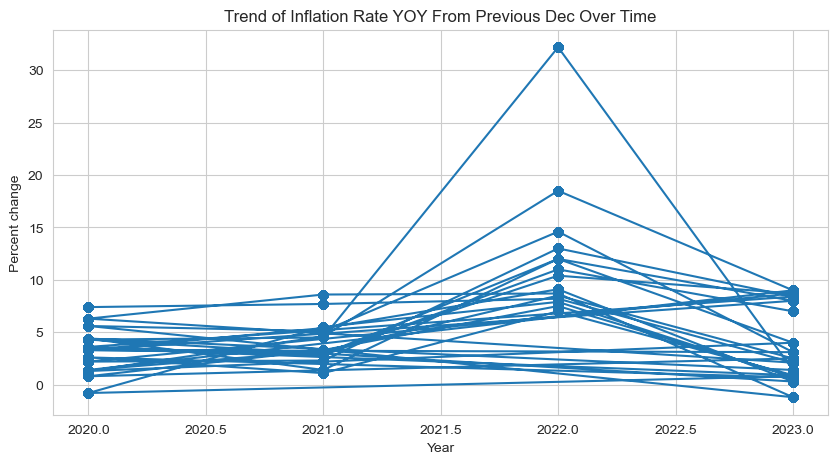

In [117]:
# Plot the trend of Inflation Rate YOY From Previous Dec over time
plt.figure(figsize=(10, 5))
plt.plot(sales_inflation_data['Year'], sales_inflation_data['Percent change'], marker='o', linestyle='-')
plt.title('Trend of Inflation Rate YOY From Previous Dec Over Time')
plt.xlabel('Year')
plt.ylabel('Percent change')
plt.grid(True)
plt.show()

In [118]:
# Checking correlations between inflation rate and price (for example)
correlation_inflation_price = sales_inflation_data[['Inflation Rate YOY From Previous Dec', 'Price']].corr()
print(correlation_inflation_price)



                                      Inflation Rate YOY From Previous Dec  \
Inflation Rate YOY From Previous Dec                              1.000000   
Price                                                            -0.003531   

                                         Price  
Inflation Rate YOY From Previous Dec -0.003531  
Price                                 1.000000  


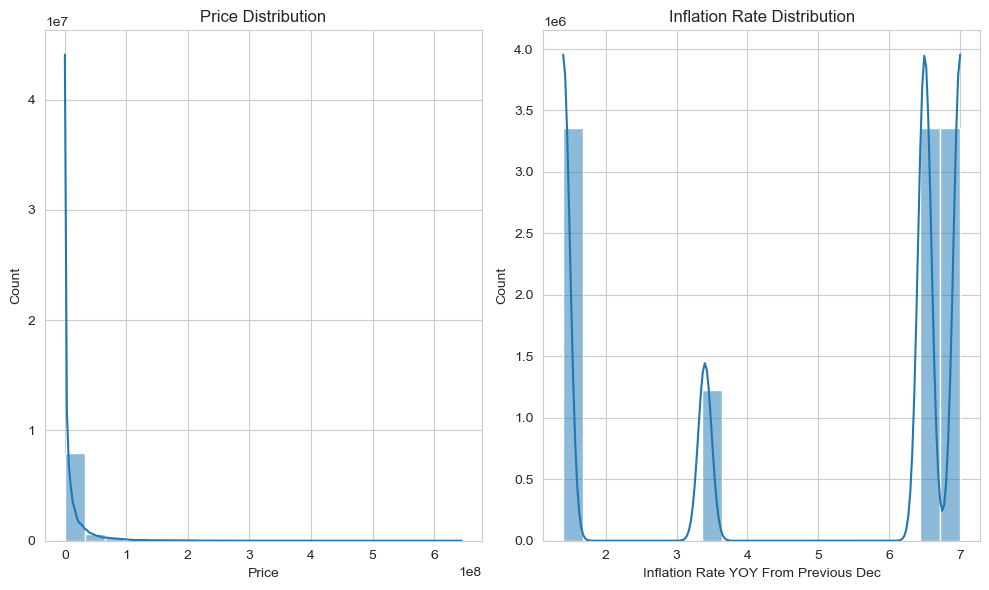

In [119]:

# Plotting histograms for price and inflation rate
plt.figure(figsize=(10, 6))

# Plot price distribution
plt.subplot(1, 2, 1)
sns.histplot(sales_inflation_data['Price'], bins=20, kde=True)
plt.title('Price Distribution')

# Plot inflation rate distribution
plt.subplot(1, 2, 2)
sns.histplot(sales_inflation_data['Inflation Rate YOY From Previous Dec'], bins=20, kde=True)
plt.title('Inflation Rate Distribution')

plt.tight_layout()
plt.show()


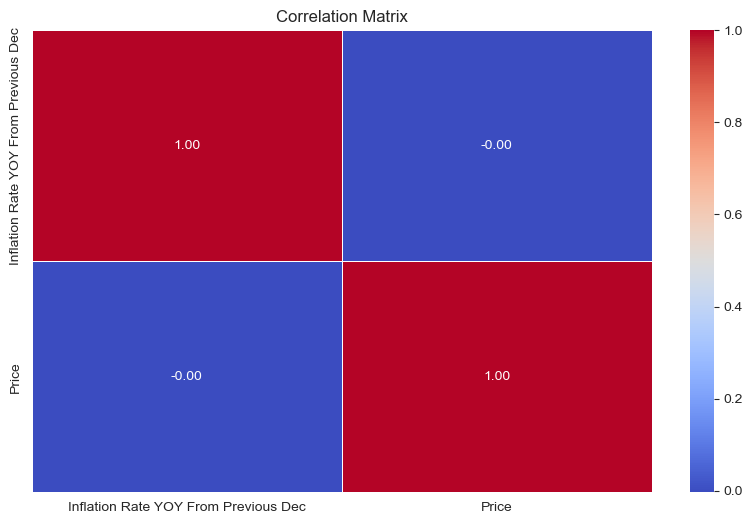

In [120]:


# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_inflation_price, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


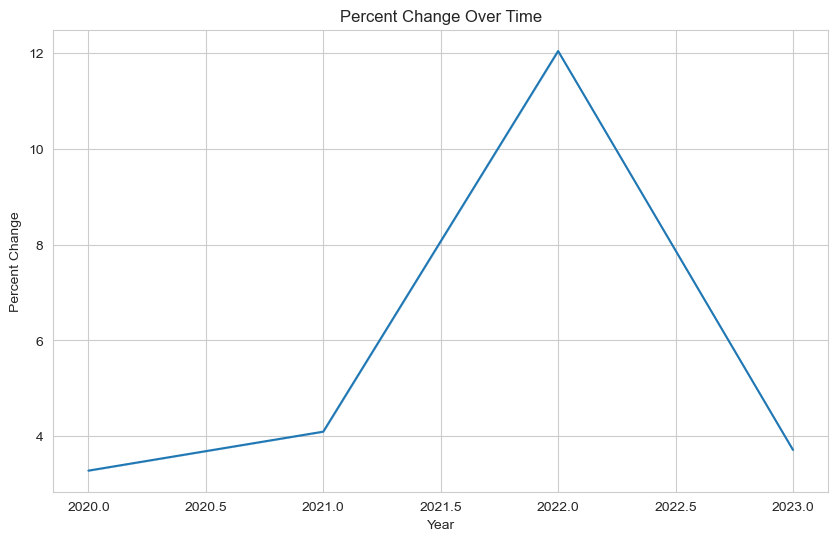

In [121]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Percent change', data=sales_inflation_data)
plt.title('Percent Change Over Time')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.show()


In [139]:

#total revenue by category
grouped_stats = sales_inflation_data.groupby('Category', as_index=False)['Price'].sum()

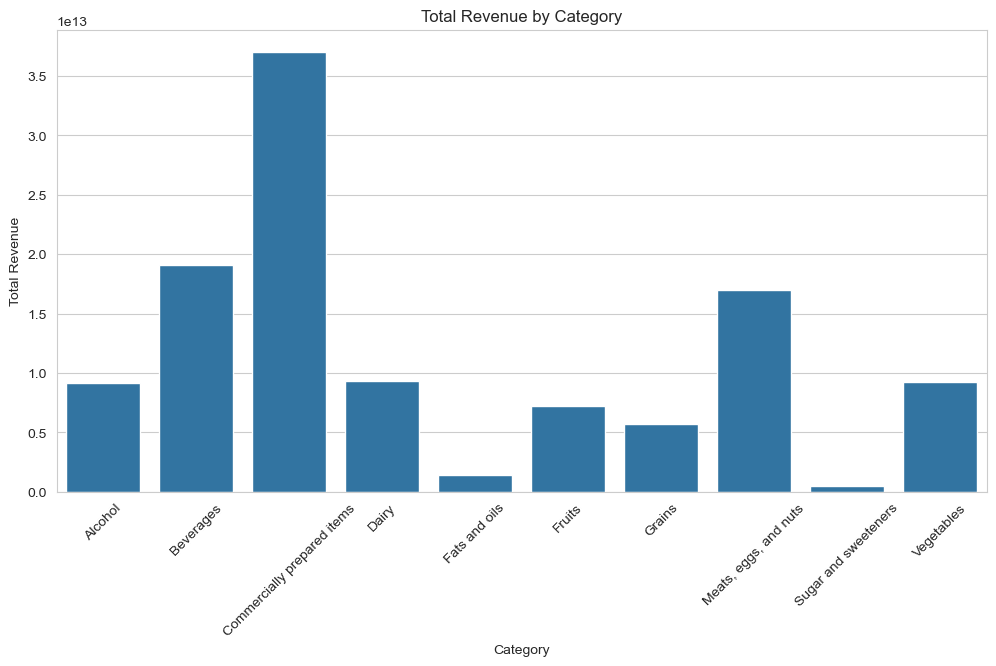

In [144]:

# Bar chart for total revenue by category
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_stats, x='Category', y='Price')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [146]:
sales_inflation_data.to_csv('sales_inflation_data.csv', index=False)
